<a href="https://colab.research.google.com/github/GaneshSelvaraj717/Ganesh-Selvaraj/blob/master/Copy_of_Copy_of_Copy_of_M3_Mini_Hackathon_3_Challenge_To_Detect_Face_Masks_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint

### Kaggle Competition Notebook for Group Assignment: Challenge To Detect Face Masks Using Convolutional Neural Networks

## Learning Objectives

At the end of the mini-hackathon, you will be able to :

* load and extract features of images 
* build the convolutional neural networks
* use the pre-trained models of keras/Pytorch

## Introduction

This competition uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool. 
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

## Dataset

The data for this mini-hackathon is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of approximately 5059 train images and approximately 1300 validation and 660 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people are not correctly wearing their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset; namely, the Correctly Masked Face, the Incorrectly Masked Face and their combination for the global masked face detection. This dataset serves the objective of classifying faces that are: 
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

### Instructions for downloading test data from kaggle are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at https://www.kaggle.com/t/1f1f584df43c411bace6823c74c2ea52 and open your user settings page. Click Account.

![alt text](https://i.stack.imgur.com/jxGQv.png)

### 2. Next, scroll down to the API access section and click generate to download an API key (kaggle.json). 
![alt text](https://i.stack.imgur.com/Hzlhp.png)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

sample_data/


### 4. Install the Kaggle API using the following command


In [ ]:
!pip install -U -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 4.1 MB/s 
ERROR: Operation cancelled by user


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '404 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [ ]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c challenge-to-detect-face-masks
!unzip challenge-to-detect-face-masks.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open challenge-to-detect-face-masks.zip, challenge-to-detect-face-masks.zip.zip or challenge-to-detect-face-masks.zip.ZIP.


## Grading = 10 Points

## YOUR CODING STARTS FROM HERE

In [ ]:
#@title Run this cell to download the train data
!wget -qq https://cdn.extras.talentsprint.com/DLFA/Experiment_related_data/facemask_detection.zip
!unzip -qq facemask_detection.zip
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Import Required packages

In [ ]:
# YOUR CODE HERE
# Importing Pytorch library
import torch.nn as nn
import torch.nn.functional as F

import torch
import torchvision
from torchvision import datasets, transforms, models

# Matplotlib is used for ploting graphs
import matplotlib.pyplot as plt
import numpy as np

### **Stage 1:** Data Loading and preprocessing of Images (2 points)

#### Analyze the shape of images and distribution of classes

In [ ]:
# YOUR CODE HERE
data_path = "/content/facemask_detection/train"

import torchvision.transforms as transforms
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])
# Comment 1 : Load the datasets with ImageFolder
train_datasets = datasets.ImageFolder(root= "/content/facemask_detection/train", transform=data_transforms)
val_datasets = datasets.ImageFolder(root= "/content/facemask_detection/validation", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_dataloaders = torch.utils.data.DataLoader(train_datasets, batch_size=100, shuffle=True, num_workers=2) 
val_dataloaders = torch.utils.data.DataLoader(val_datasets, batch_size=100, shuffle=True, num_workers=2)

#### Visualize the sample images of each class


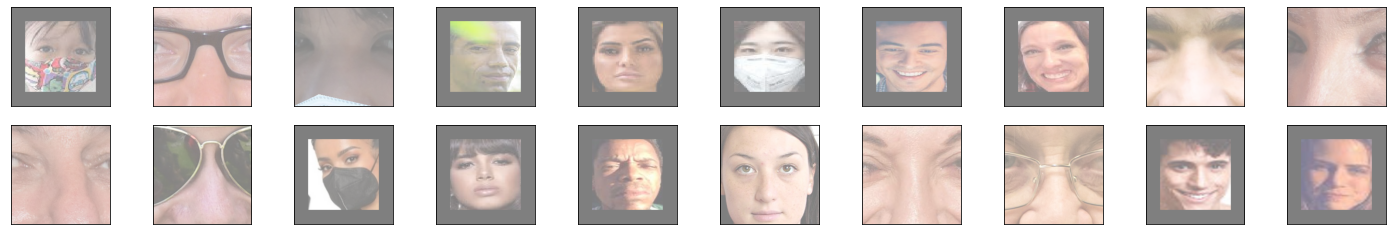

In [ ]:
# YOUR CODE HERE

import matplotlib.pyplot as plt
%matplotlib inline
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
dataiter = iter(train_dataloaders)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

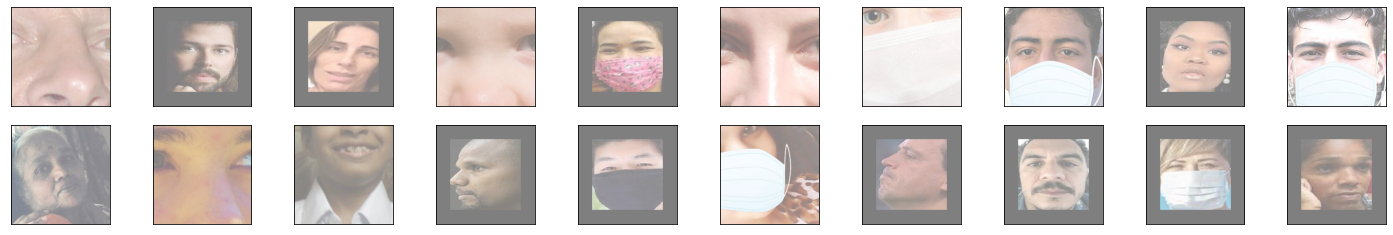

In [ ]:
dataiter = iter(val_dataloaders)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

### **Stage 2:** Build and train the CNN model using Keras/Pytorch (3 points)



AttributeError: ignored

### **Stage 3:** Transfer learning (3 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



### Use the pre-trained models (VGG16, ResNet50, GoogleNet etc.)

* Load the pre-trained model
* Train and evaluate the images

In [ ]:
# YOUR CODE HERE

**Note:** Make a submission on kaggle using CNN model and Pre-trained model and then compare the model performance on the kaggle testset

###   **Stage 4**: Evaluate the Model and get model predictions on the Kaggle testset (2 Points)

#### Expected accuracy: More than 90%








In [ ]:
# YOUR CODE HERE

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Plot the confusion matrix in terms of the misclassifications

### Capture the live image using the below code cell and predict

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:** 
* Convert the image to numpy array and resize to the shape which model accept. 
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

In [ ]:
import PIL
from matplotlib import pyplot as plt
features = PIL.Image.open("photo.jpg")
plt.imshow(features);
# YOUR CODE HERE to predict the image